In [1]:
import sys
import os

# add to path the additional modules implemented for PAVNET data analysis
sys.path.append("/home/aldo//notebooks/code/")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.fft import fft, fftfreq, fftshift
from scipy.signal import firwin, filtfilt
import time
import gc
import fft_pavnet
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [2]:
path = "/data/savnet/SAVNET_RAW_24h/"

In [3]:
fs = 96e3       # sampling frequency
sps = int(fs)   # sampels per second
fb = 200        # bit rate
Tb = 1/fb       # bit period



In [4]:
## obs: we have no GPS PPS segnal, then a drift might be seen

In [5]:
! ls $path

savnet_24h_p1.npy  savnet_24h_p5.npy	  savnet_24h_PPS_p4.npy
savnet_24h_p2.npy  savnet_24h_PPS_p1.npy  savnet_24h_PPS_p5.npy
savnet_24h_p3.npy  savnet_24h_PPS_p2.npy  structinfo.txt
savnet_24h_p4.npy  savnet_24h_PPS_p3.npy


In [6]:
files = [
            "savnet_24h_p1.npy", 
            "savnet_24h_p2.npy", 
            "savnet_24h_p3.npy", 
            "savnet_24h_p5.npy", 
        ]

In [7]:
wlen = sps
nfft = 4096 
ftx = 24e3

## MMilla method

In [38]:
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter

In [10]:
tail = 0
t_ = np.arange(sps)*1/fs

In [32]:
def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

In [46]:
hpf = signal.firwin(51, cutoff=15e3, window="flattop", 
                    fs=fs, pass_zero="highpass")
indexf = int(wlen/2)
freq = fftfreq(wlen, 1/fs)[:indexf]

for f in files[:2]:
    data = np.load(path+f, mmap_mode="r")
    nlen = len(data)
    ii = 0
    nseg = nlen//wlen
    for k in range(0, nseg)[:1]:
        xt = data[k*wlen : (k+1)*wlen]
        xt = signal.filtfilt(hpf,1,xt)
        X = fftshift(fft(xt))[:indexf]

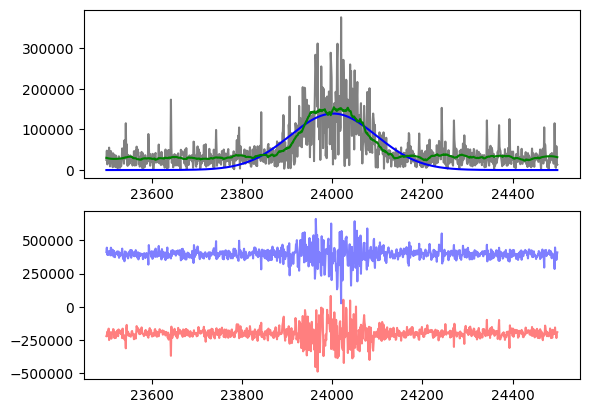

In [51]:
fw = freq[23500:24500]
Xw = X[23500:24500]

params0 = [np.max(abs(Xw)), 24e3,1]
pfit, _ = curve_fit(gaussian, fw, abs(Xw), p0=params0)
A_fit, mu_fit, sigma_fit = pfit
Xw_fit = gaussian(fw, A_fit, mu_fit, sigma_fit)
Xw_sg = savgol_filter(abs(Xw), 71, 3)
plt.subplot(211)
plt.plot(fw, abs(Xw), c="gray")
plt.plot(fw, abs(Xw_fit), c="b")
plt.plot(fw, abs(Xw_sg), c="g")
#plt.xlim(23e3, 25e3)
#plt.ylim(0, 0.15e7)
plt.subplot(212)
plt.plot(fw, Xw.real+400e3, c="blue", alpha=0.5)
plt.plot(fw, Xw.imag-200e3, c="red", alpha=0.5)
#plt.xlim(23e3, 25e3)
#plt.ylim(-0.15e7 , 0.15e7)


In [55]:

Xw_ = Xw.real[abs(Xw)>100e3]+ 1j*Xw.imag[abs(Xw)>100e3]
fw_ = fw[abs(Xw)>100e3]

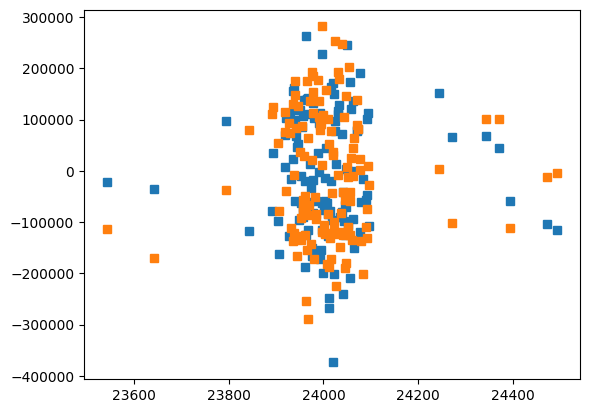

In [58]:
plt.plot(fw_, Xw_.real, "s")
plt.plot(fw_, Xw_.imag, "s")

In [44]:
print(fw[np.argmax(Xw_fit)])
print(fw[np.argmax(Xw_sg)])

23999.0
23998.0


In [ ]:
tail = 0
t_ = np.arange(samples_per_second)/fs
for f in files:
    data = np.load(path+f, mmap_mode="r")
    nlen = len(data)
    ii = 0
    nseg = nlen//wlen
    for k in range(0, nseg, 10):
        x = data[k*wlen: (k+1)*wlen]
        st = butter_filt(x, 12e3, ftype="hp", fs=fs)
        It = st * np.cos(2*np.pi*ftx*t_) 
        Qt = st * np.sin(2*np.pi*ftx*t_)
        It = filtfilt(lp_filter, 1, It)
        Qt = filtfilt(lp_filter, 1, Qt)
        It_filt = np.convolve(It, ut, mode="valid")
        Qt_filt = np.convolve(Qt, ut, mode="valid")  
    

In [9]:
data = np.load(path+files[0], mmap_mode="r")

In [15]:
print(not 
      0)

True


In [16]:
n = len(data)

In [20]:
n/4096

488281.640625

In [21]:
2**12

4096

In [22]:
488281 * 2**12

1999998976

In [26]:
files[:1]

['savnet_24h_p1.npy']

In [24]:
n

2000001600